# Introduction
After doing data analysis on the dataset and setting up the recent years to create models on them, it is now possible to start doing linear regression models.

# Methodology
The methodology being used here is linear regression. What that means is a model will be create using a linear regression algorithm and computer to create a prediction number on how the data will go. This is done by choosing a variable or variables, which will be the weather fields, and a constant, which will be the number of collisions.

In [45]:
# Imports
import pandas as pd
import numpy as np

import tensorflow as tf

from tensorflow import keras
from keras import layers

import matplotlib.pyplot as plt

# Getting the Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Finn-Anderson/BscHons-Data-Analytics/main/collinearregressiondata.csv', index_col = 0)

In [3]:
print(df)

      day  mxpsd   max  fog  NUM_COLLISIONS
3092    3   20.0  52.0    0        0.340174
2810    4   19.0  46.0    0        0.948172
1776    5   15.0  46.9    0        1.338380
341     6    9.9  48.9    1        0.403696
4034    7   27.0  48.9    1       -0.158930
...   ...    ...   ...  ...             ...
20      3    7.0  55.9    1       -0.955761
3210    4   20.0  55.9    1        0.264004
3573    5   22.0  55.9    0       -0.048756
2694    6   18.1  48.9    1       -1.143417
1456    7   14.0  48.9    0       -2.457010

[1461 rows x 5 columns]


In [146]:
df = df.dropna(axis = 0, how = "any")

In [277]:
df

,day,mxpsd,max,fog,NUM_COLLISIONS
3092,3,20.0,52.0,0,0.340174
2810,4,19.0,46.0,0,0.948172
1776,5,15.0,46.9,0,1.338380
341,6,9.9,48.9,1,0.403696
4034,7,27.0,48.9,1,-0.158930
...,...,...,...,...,...
20,3,7.0,55.9,1,-0.955761
3210,4,20.0,55.9,1,0.264004
3573,5,22.0,55.9,0,-0.048756
2694,6,18.1,48.9,1,-1.143417


Drop rows with no data as those will not need to be processed in the linear regression models.

# Shuffle and select 10% of data
Doing a linear regression model over the whole data would take a lot of time. So, the solution to this is to take only a percentage of the dataset. 10% was chosen as that would represent around 146 rows which is a good amount of data to analyse.

To keep the data random so that multiple tests over the whole dataset can be done without having to check the whole dataset, a shuffle is done over the dataset before the limit is done.

For later analysing, if randomising is bad, the then shuffle return result can be saved to a variable and then the variable can be used instead of the shuffle function.

In [147]:
trainsize = int(len(df["NUM_COLLISIONS"]) * 0.9)
testsize = len(df["NUM_COLLISIONS"]) - trainsize

In [148]:
shuffledCollisions = df.sample(frac = 1).reset_index(drop = True)

In [149]:
def shuffle(value):
    return shuffledCollisions.sort_values(by=["NUM_COLLISIONS"])[value].head(testsize)

# Functionality

Below is the setup for the functionality. SCALE_NUM_COLLISIONS is a variable that will be used to tune the results and get the mean absolute error as low as possible.

The functionality will run the linear regression tests before then returning the model that has been made with the input along with the mean absolute error.

In [150]:
SCALE_NUM_COLLISIONS = 1.0

In [151]:
def getMeanAbsoluteError(df_input):
    training_set = df_input.sample(frac = 0.8, random_state = 0)

    test_set = df_input.drop(training_set.index)

    training_features = training_set.copy()
    test_features = test_set.copy()

    training_labels = training_features.pop("NUM_COLLISIONS")
    test_labels = test_features.pop("NUM_COLLISIONS")

    training_labels = training_labels/SCALE_NUM_COLLISIONS
    test_labels = test_labels/SCALE_NUM_COLLISIONS

    if training_set.columns.size > 2:
        normaliser = tf.keras.layers.Normalization(axis = -1)
    else:
        normaliser = tf.keras.layers.Normalization(input_shape = [1,], axis = None)

    normaliser.adapt(np.array(training_features))

    model = tf.keras.Sequential([
        normaliser,
        layers.Dense(units = 1)
    ])

    model.compile(
        optimizer=tf.optimizers.Adam(learning_rate = 0.1),
        loss='mean_absolute_error')

    history = model.fit(
        training_features,
        training_labels,
        epochs = 100,
        verbose = 0,
        validation_split = 0.2)

    mean_absolute_error = model.evaluate(
        test_features,
        test_labels, verbose = 0)

    return {"model": model, "error": mean_absolute_error}

# Calibration
To calibrate the mean absolute error, the day field will be used.

In [152]:
df_input_data_day = [df["day"], df["NUM_COLLISIONS"]]

df_input_headers_day = ["day", "NUM_COLLISIONS"]

df_input_day = pd.concat(df_input_data_day, axis = 1, keys = df_input_headers_day)

In [153]:
input_day = pd.DataFrame.from_dict(data =
    {
        "day" : shuffle("day")
    })

In [154]:
results_day1 = getMeanAbsoluteError(df_input_day)

In [155]:
print(results_day1["error"])

0.8081671595573425


In [156]:
linear_predictions_day1 = results_day1["model"].predict(input_day) * SCALE_NUM_COLLISIONS
print(linear_predictions_day1)

5/5 [==============================] - 0s 3ms/step
[[ 0.01985231]
 [-0.04677649]
 [-0.04677649]
 [ 0.01985231]
 [-0.01346209]
 [-0.04677649]
 [ 0.01985231]
 [-0.03567169]
 [-0.04677649]
 [-0.04677649]
 [-0.04677649]
 [-0.04677649]
 [ 0.01985231]
 [ 0.00874751]
 [-0.03567169]
 [-0.04677649]
 [-0.01346209]
 [ 0.01985231]
 [-0.00235729]
 [ 0.01985231]
 [-0.04677649]
 [-0.04677649]
 [ 0.01985231]
 [-0.02456689]
 [-0.01346209]
 [ 0.00874751]
 [ 0.01985231]
 [-0.04677649]
 [ 0.01985231]
 [ 0.01985231]
 [-0.04677649]
 [-0.03567169]
 [-0.01346209]
 [-0.04677649]
 [-0.04677649]
 [-0.04677649]
 [ 0.00874751]
 [-0.04677649]
 [-0.01346209]
 [-0.04677649]
 [-0.00235729]
 [-0.04677649]
 [ 0.01985231]
 [-0.01346209]
 [-0.01346209]
 [-0.01346209]
 [-0.04677649]
 [-0.04677649]
 [-0.00235729]
 [-0.03567169]
 [-0.02456689]
 [ 0.00874751]
 [-0.04677649]
 [-0.04677649]
 [ 0.00874751]
 [-0.04677649]
 [-0.02456689]
 [ 0.00874751]
 [-0.03567169]
 [-0.03567169]
 [-0.01346209]
 [-0.03567169]
 [-0.00235729]
 [-0

Text(0, 0.5, 'number of collisions standardized')

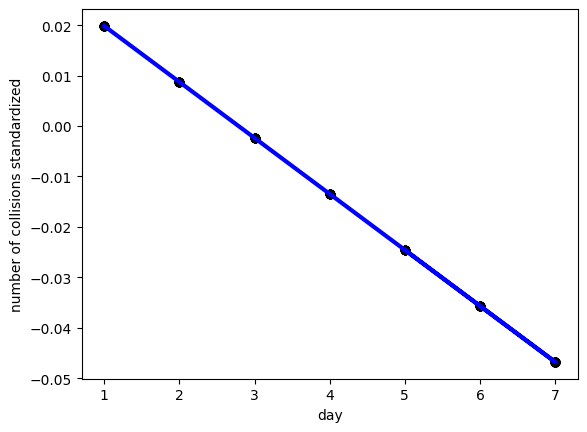

In [279]:
plt.scatter(input_day, linear_predictions_day1, color="black")
plt.plot(input_day, linear_predictions_day1, color="blue", linewidth=3)
plt.xlabel("day")
plt.ylabel("number of collisions standardized")

The number of the mean absolute error is high when it should be low. To solve this, the SCALE_NUM_COLLISIONS variable can be set to a high number which should reduce the mean absolute error. A target of 0.01 mean absolute error should be good enough.

There are instances where the mean absolute error can be low with the right set of data. If those only occur very rarely, then they should be taken as anomalies.

In [158]:
SCALE_NUM_COLLISIONS = 100

In [159]:
results_day = getMeanAbsoluteError(df_input_day)

In [160]:
print(results_day["error"])

0.018080485984683037


In [161]:
linear_predictions_day2 = results_day["model"].predict(input_day) * SCALE_NUM_COLLISIONS
print(linear_predictions_day2 )

5/5 [==============================] - 0s 2ms/step
[[ 3.428685  ]
 [-1.1420635 ]
 [-1.1420635 ]
 [ 3.428685  ]
 [ 1.1433107 ]
 [-1.1420635 ]
 [ 3.428685  ]
 [-0.38027224]
 [-1.1420635 ]
 [-1.1420635 ]
 [-1.1420635 ]
 [-1.1420635 ]
 [ 3.428685  ]
 [ 2.6668935 ]
 [-0.38027224]
 [-1.1420635 ]
 [ 1.1433107 ]
 [ 3.428685  ]
 [ 1.9051021 ]
 [ 3.428685  ]
 [-1.1420635 ]
 [-1.1420635 ]
 [ 3.428685  ]
 [ 0.38151923]
 [ 1.1433107 ]
 [ 2.6668935 ]
 [ 3.428685  ]
 [-1.1420635 ]
 [ 3.428685  ]
 [ 3.428685  ]
 [-1.1420635 ]
 [-0.38027224]
 [ 1.1433107 ]
 [-1.1420635 ]
 [-1.1420635 ]
 [-1.1420635 ]
 [ 2.6668935 ]
 [-1.1420635 ]
 [ 1.1433107 ]
 [-1.1420635 ]
 [ 1.9051021 ]
 [-1.1420635 ]
 [ 3.428685  ]
 [ 1.1433107 ]
 [ 1.1433107 ]
 [ 1.1433107 ]
 [-1.1420635 ]
 [-1.1420635 ]
 [ 1.9051021 ]
 [-0.38027224]
 [ 0.38151923]
 [ 2.6668935 ]
 [-1.1420635 ]
 [-1.1420635 ]
 [ 2.6668935 ]
 [-1.1420635 ]
 [ 0.38151923]
 [ 2.6668935 ]
 [-0.38027224]
 [-0.38027224]
 [ 1.1433107 ]
 [-0.38027224]
 [ 1.9051021 ]
 [-0

Text(0, 0.5, 'number of collisions standardized')

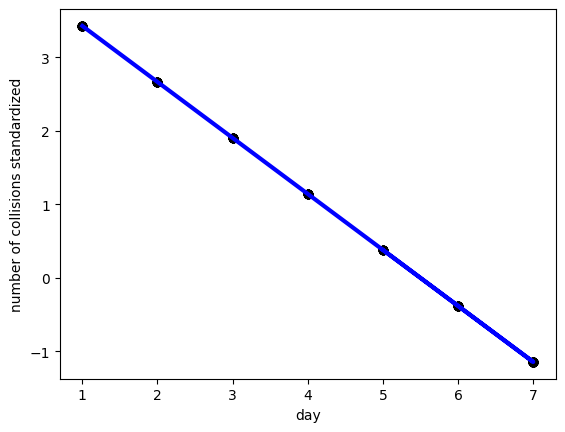

In [278]:
plt.scatter(input_day, linear_predictions_day2 , color="black")
plt.plot(input_day, linear_predictions_day2 , color="blue", linewidth=3)
plt.xlabel("day")
plt.ylabel("number of collisions standardized")

As shown above, after setting the SCALE_NUM_COLLISIONS value to 100, the mean absolute error decreased to an acceptable level.

Also, the linear prediction values have risen, which should give a clearer picture on the correlations.

It is important to note was done before in assignment 1: day does not have a massive correlation to the number of collisions.

# Simple Linear Regression Models

**MAX TEMPERATURE**

In [163]:
df_input_data_t = [df["max"], df["NUM_COLLISIONS"]]

df_input_headers_t = ["max", "NUM_COLLISIONS"]

df_input_t = pd.concat(df_input_data_t, axis = 1, keys = df_input_headers_t)

In [164]:
results_t = getMeanAbsoluteError(df_input_t)

In [165]:
print(results_t["error"])

0.013981785625219345


In [166]:
input_t = pd.DataFrame.from_dict(data =
    {
        "max" : shuffle("max")
    })

In [169]:
linear_predictions_t = results_t["model"].predict(input_t) * SCALE_NUM_COLLISIONS
print(linear_predictions_t)

5/5 [==============================] - 0s 2ms/step
[[ 0.75585794]
 [ 0.8432285 ]
 [-0.21441439]
 [-0.03047641]
 [ 0.8846146 ]
 [ 0.10747695]
 [ 0.61330616]
 [ 0.56272334]
 [ 0.05689412]
 [ 0.61330616]
 [ 0.75585794]
 [ 0.56272334]
 [ 0.663889  ]
 [ 0.8846146 ]
 [ 0.61330616]
 [ 0.38338384]
 [ 0.7052751 ]
 [ 0.7972441 ]
 [ 0.56272334]
 [ 0.8432285 ]
 [ 0.56272334]
 [ 0.7052751 ]
 [ 1.1697183 ]
 [-0.04887031]
 [ 0.8846146 ]
 [ 0.199446  ]
 [ 0.34199768]
 [-0.2649972 ]
 [ 0.10747695]
 [ 1.3904438 ]
 [ 0.75585794]
 [-0.21441439]
 [ 1.5835785 ]
 [ 0.61330616]
 [-0.07186253]
 [ 0.38338384]
 [ 0.61330616]
 [ 0.7052751 ]
 [ 0.663889  ]
 [ 0.7972441 ]
 [ 0.56272334]
 [ 0.75585794]
 [ 0.663889  ]
 [ 0.9351974 ]
 [ 0.56272334]
 [ 0.7052751 ]
 [ 0.47075436]
 [-0.4857228 ]
 [ 0.14886306]
 [ 0.75585794]
 [ 0.663889  ]
 [ 0.8432285 ]
 [ 0.47075436]
 [ 0.34199768]
 [ 0.56272334]
 [ 0.5213373 ]
 [ 0.9351974 ]
 [ 0.7052751 ]
 [ 0.663889  ]
 [ 0.47075436]
 [ 0.663889  ]
 [ 0.663889  ]
 [ 0.97658354]
 [ 0

Text(0, 0.5, 'number of collisions standardized')

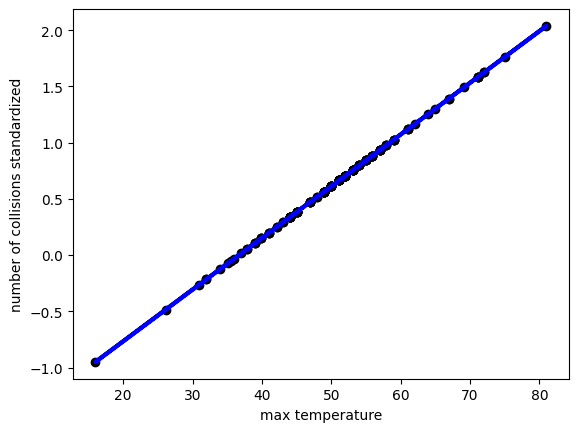

In [266]:
plt.scatter(input_t, linear_predictions_t, color="black")
plt.plot(input_t, linear_predictions_t, color="blue", linewidth=3)
plt.xlabel("max temperature")
plt.ylabel("number of collisions standardized")

**MAX WIND SPEED**

In [171]:
df_input_data_w = [df["mxpsd"], df["NUM_COLLISIONS"]]

df_input_headers_w = ["mxpsd", "NUM_COLLISIONS"]

df_input_w = pd.concat(df_input_data_w, axis = 1, keys = df_input_headers_w)

In [172]:
results_w = getMeanAbsoluteError(df_input_w)

In [173]:
print(results_w["error"])

0.009124476462602615


In [174]:
input_w = pd.DataFrame.from_dict(data =
    {
        "mxpsd" : shuffle("mxpsd")
    })

In [175]:
linear_predictions_w = results_w["model"].predict(input_w) * SCALE_NUM_COLLISIONS
print(linear_predictions_w)

5/5 [==============================] - 0s 2ms/step
[[-0.5182314 ]
 [-0.29494402]
 [ 0.2833132 ]
 [-0.34647185]
 [-0.5182314 ]
 [-0.16898696]
 [ 0.23178537]
 [-0.40372503]
 [-0.4609782 ]
 [ 0.23178537]
 [-0.11745911]
 [-0.40372503]
 [-0.06020592]
 [-0.5697593 ]
 [-0.5182314 ]
 [-0.22624014]
 [-0.5182314 ]
 [ 0.8501198 ]
 [-0.63846314]
 [ 0.23178537]
 [ 0.9073731 ]
 [ 1.8291494 ]
 [-0.00295273]
 [ 0.1058283 ]
 [-0.00295273]
 [-0.29494402]
 [-0.11745911]
 [-0.00295273]
 [-0.5182314 ]
 [-0.40372503]
 [ 0.44934744]
 [-0.4609782 ]
 [-0.5182314 ]
 [-0.6957163 ]
 [ 0.23178537]
 [-0.22624014]
 [-0.06020592]
 [ 0.17453218]
 [ 0.44934744]
 [-0.06020592]
 [-0.29494402]
 [-0.34647185]
 [-0.4609782 ]
 [-0.22624014]
 [-0.11745911]
 [-0.16898696]
 [-0.16898696]
 [ 0.23178537]
 [ 0.05430043]
 [ 0.1058283 ]
 [ 0.5066006 ]
 [-0.16898696]
 [-0.34647185]
 [-0.4609782 ]
 [-0.40372503]
 [-0.4609782 ]
 [-0.29494402]
 [ 0.17453218]
 [-0.00295273]
 [-0.06020592]
 [-0.63846314]
 [-0.16898696]
 [-0.40372503]
 [ 0

Text(0, 0.5, 'number of collisions standardized')

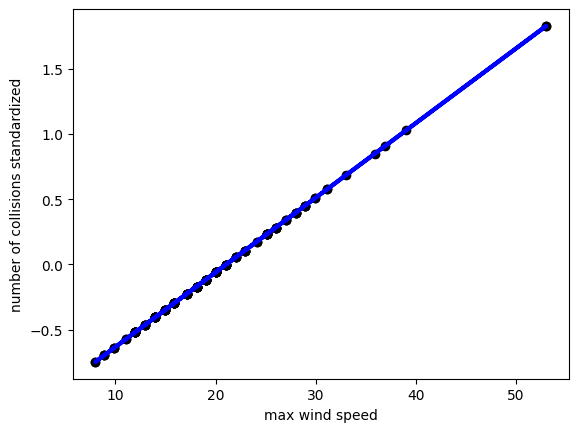

In [267]:
plt.scatter(input_w, linear_predictions_w, color="black")
plt.plot(input_w, linear_predictions_w, color="blue", linewidth=3)
plt.xlabel("max wind speed")
plt.ylabel("number of collisions standardized")

**FOG**

In [177]:
df_input_data_f = [df["fog"], df["NUM_COLLISIONS"]]

df_input_headers_f = ["fog", "NUM_COLLISIONS"]

df_input_f = pd.concat(df_input_data_f, axis = 1, keys = df_input_headers_f)

In [178]:
results_f = getMeanAbsoluteError(df_input_f)

In [179]:
print(results_f["error"])

0.010627390816807747


In [180]:
input_f = pd.DataFrame.from_dict(data =
    {
        "fog" : shuffle("fog")
    })

In [184]:
linear_predictions_f = results_f["model"].predict(input_f) * SCALE_NUM_COLLISIONS
print(linear_predictions_f)

5/5 [==============================] - 0s 2ms/step
[[0.87037367]
 [0.43091533]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.43091533]
 [0.87037367]
 [0.87037367]
 [0.43091533]
 [0.43091533]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.43091533]
 [0.87037367]
 [0.43091533]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.43091533]
 [0.87037367]
 [0.43091533]
 [0.43091533]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.43091533]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.43091533]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.87037367]
 [0.8703736

Text(0, 0.5, 'number of collisions standardized')

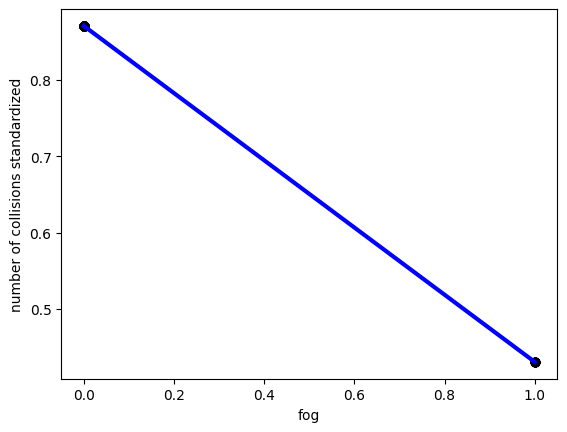

In [268]:
plt.scatter(input_f, linear_predictions_f, color="black")
plt.plot(input_f, linear_predictions_f, color="blue", linewidth=3)
plt.xlabel("fog")
plt.ylabel("number of collisions standardized")

With the predictions, the main use of them is to look at the line and the scatter plots. The scatter plots indiciate the data and the sample size (so more dots in an area means more data) and the line indicates the prediction made by the linear regression model.

So, looking at max temperature and max wind speed, they have lines increasing as the max temperature and max wind speed rises, indicating a positive correlation and a prediction that greater temperatures and wind speeds will result in a higher number of collisions.

Fog on the other hand is the opposite, with the linear regression model predicting that fog will contribtue to fewer number of collisions.

# Multiple Linear Regression Models

**MAX TEMPERATURE AND MAX WIND SPEED**

In [186]:
df_input_data_tw = [df["max"], df["mxpsd"], df["NUM_COLLISIONS"]]

df_input_headers_tw = ["max", "mxpsd", "NUM_COLLISIONS"]

df_input_tw = pd.concat(df_input_data_tw, axis = 1, keys = df_input_headers_tw)

In [187]:
results_tw = getMeanAbsoluteError(df_input_tw)

In [188]:
print(results_tw["error"])

0.021530473604798317


In [189]:
input_tw = pd.DataFrame.from_dict(data =
    {
        "max" : shuffle("max"),
        "mxpsd" : shuffle("mxpsd")
    })

In [191]:
linear_predictions_tw = results_tw["model"].predict(input_tw) * SCALE_NUM_COLLISIONS
print(linear_predictions_tw)

5/5 [==============================] - 0s 5ms/step
[[-2.9126258 ]
 [-1.404749  ]
 [ 1.9289821 ]
 [-2.1325092 ]
 [-2.8553345 ]
 [-0.9034586 ]
 [ 1.9582812 ]
 [-2.2452283 ]
 [-2.846967  ]
 [ 1.9582812 ]
 [-0.27595758]
 [-2.2452283 ]
 [ 0.05978709]
 [-3.1943347 ]
 [-2.976055  ]
 [-1.157359  ]
 [-2.9351327 ]
 [ 6.1081276 ]
 [-3.7895627 ]
 [ 2.0605865 ]
 [ 6.380443  ]
 [12.508209  ]
 [ 0.66152567]
 [ 0.83497447]
 [ 0.5346672 ]
 [-1.691204  ]
 [-0.46010715]
 [ 0.02314057]
 [-3.2011266 ]
 [-1.8769292 ]
 [ 3.453044  ]
 [-2.9676874 ]
 [-2.5443265 ]
 [-4.1437225 ]
 [ 1.6534113 ]
 [-1.157359  ]
 [ 0.03727991]
 [ 1.6225365 ]
 [ 3.4121222 ]
 [ 0.11912417]
 [-1.5295614 ]
 [-1.7826252 ]
 [-2.5768812 ]
 [-0.9118264 ]
 [-0.36189398]
 [-0.63746476]
 [-0.7418162 ]
 [ 1.4692618 ]
 [ 0.58395696]
 [ 1.193043  ]
 [ 3.7887893 ]
 [-0.5760816 ]
 [-1.9094836 ]
 [-2.7201085 ]
 [-2.2452283 ]
 [-2.6403103 ]
 [-1.3638269 ]
 [ 1.6225365 ]
 [ 0.436454  ]
 [-0.0261493 ]
 [-3.7445486 ]
 [-0.6558798 ]
 [-2.0610788 ]
 [ 1

Text(0, 0.5, 'number of collisions standardized')

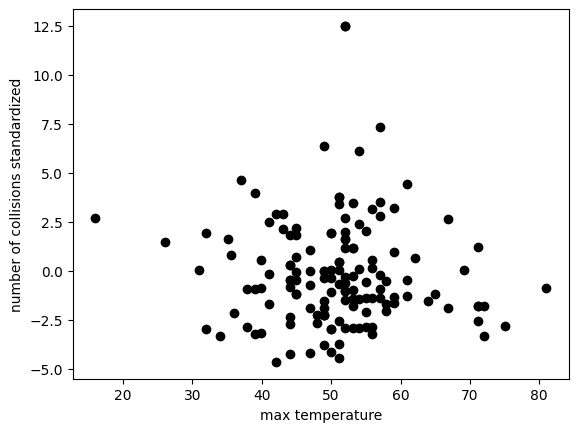

In [265]:
plt.scatter(input_tw["max"], linear_predictions_tw, color="black")
plt.xlabel("max temperature")
plt.ylabel("number of collisions standardized")

Text(0, 0.5, 'number of collisions standardized')

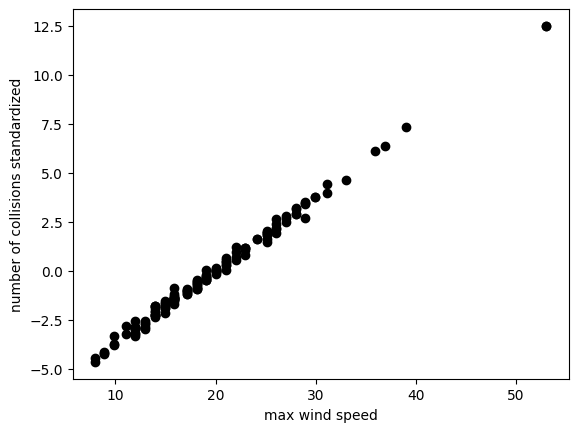

In [269]:
plt.scatter(input_tw["mxpsd"], linear_predictions_tw, color="black")
plt.xlabel("max wind speed")
plt.ylabel("number of collisions standardized")

**MAX TEMPERATURE AND FOG**

In [212]:
df_input_data_tf = [df["max"], df["fog"], df["NUM_COLLISIONS"]]

df_input_headers_tf = ["max", "fog", "NUM_COLLISIONS"]

df_input_tf = pd.concat(df_input_data_tf, axis = 1, keys = df_input_headers_tf)

In [213]:
results_tf = getMeanAbsoluteError(df_input_tf)

In [214]:
print(results_tf["error"])

0.021534036844968796


In [215]:
input_tf = pd.DataFrame.from_dict(data =
    {
        "max" : shuffle("max"),
        "fog" : shuffle("fog")
    })

In [223]:
linear_predictions_tf = results_tf["model"].predict(input_tf) * SCALE_NUM_COLLISIONS
print(linear_predictions_tf)

5/5 [==============================] - 0s 4ms/step
[[-3.2267551 ]
 [-1.6841491 ]
 [-4.887168  ]
 [-4.572398  ]
 [-3.0064158 ]
 [-4.3363204 ]
 [-3.4707022 ]
 [-3.5572636 ]
 [-4.422882  ]
 [-2.077612  ]
 [-3.2267551 ]
 [-3.5572636 ]
 [-1.9910504 ]
 [-1.6133256 ]
 [-3.4707022 ]
 [-3.8641646 ]
 [-3.313317  ]
 [-3.155932  ]
 [-3.5572636 ]
 [-1.6841491 ]
 [-3.5572636 ]
 [-1.9202268 ]
 [-2.5185223 ]
 [-4.6038756 ]
 [-3.0064158 ]
 [-4.178935  ]
 [-3.9349885 ]
 [-4.97373   ]
 [-4.3363204 ]
 [-2.1407974 ]
 [-3.2267551 ]
 [-4.887168  ]
 [-1.810289  ]
 [-3.4707022 ]
 [-4.6432214 ]
 [-3.8641646 ]
 [-2.077612  ]
 [-3.313317  ]
 [-1.9910504 ]
 [-1.7628417 ]
 [-3.5572636 ]
 [-3.2267551 ]
 [-3.38414   ]
 [-2.919854  ]
 [-3.5572636 ]
 [-3.313317  ]
 [-3.714649  ]
 [-5.3514547 ]
 [-4.2654967 ]
 [-1.833665  ]
 [-3.38414   ]
 [-3.0772393 ]
 [-3.714649  ]
 [-3.9349885 ]
 [-3.5572636 ]
 [-3.628087  ]
 [-1.5267639 ]
 [-3.313317  ]
 [-3.38414   ]
 [-3.714649  ]
 [-3.38414   ]
 [-3.38414   ]
 [-2.8490307 ]
 [-3

Text(0, 0.5, 'number of collisions standardized')

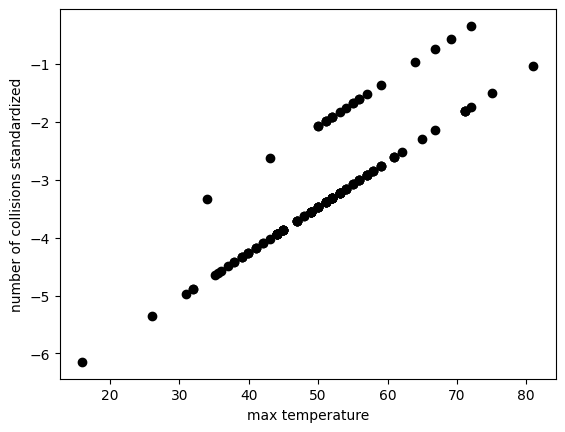

In [270]:
plt.scatter(input_tf["max"], linear_predictions_tf, color="black")
plt.xlabel("max temperature")
plt.ylabel("number of collisions standardized")

Text(0, 0.5, 'number of collisions standardized')

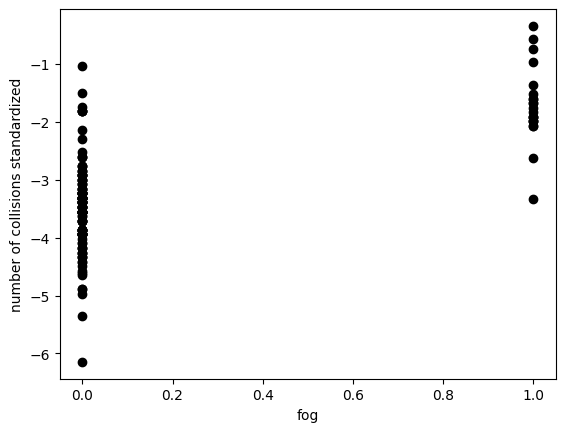

In [271]:
plt.scatter(input_tf["fog"], linear_predictions_tf, color="black")
plt.xlabel("fog")
plt.ylabel("number of collisions standardized")

**MAX WIND SPEED AND FOG**

In [229]:
df_input_data_wf = [df["mxpsd"], df["fog"], df["NUM_COLLISIONS"]]

df_input_headers_wf = ["mxpsd", "fog", "NUM_COLLISIONS"]

df_input_wf = pd.concat(df_input_data_wf, axis = 1, keys = df_input_headers_wf)

In [230]:
results_wf = getMeanAbsoluteError(df_input_wf)

In [231]:
print(results_wf["error"])

0.017534246668219566


In [232]:
input_wf = pd.DataFrame.from_dict(data =
    {
        "mxpsd" : shuffle("mxpsd"),
        "fog" : shuffle("fog")
    })

In [234]:
linear_predictions_wf = results_wf["model"].predict(input_wf) * SCALE_NUM_COLLISIONS
print(linear_predictions_wf)

5/5 [==============================] - 0s 4ms/step
[[-0.71607476]
 [ 4.2919765 ]
 [ 0.03189817]
 [-0.5557949 ]
 [-0.71607476]
 [-0.39017227]
 [-0.01618583]
 [-0.6092215 ]
 [-0.66264814]
 [ 4.783501  ]
 [-0.34208828]
 [-0.6092215 ]
 [ 4.5110254 ]
 [ 4.035528  ]
 [-0.71607476]
 [-0.4435989 ]
 [-0.71607476]
 [ 0.5608219 ]
 [-0.8282706 ]
 [ 4.783501  ]
 [ 0.6142486 ]
 [ 6.274104  ]
 [-0.23523504]
 [-0.13372451]
 [-0.23523504]
 [-0.5077109 ]
 [-0.34208828]
 [-0.23523504]
 [-0.71607476]
 [-0.6092215 ]
 [ 0.18683532]
 [-0.66264814]
 [-0.71607476]
 [-0.88169724]
 [-0.01618583]
 [-0.4435989 ]
 [ 4.5110254 ]
 [-0.06961245]
 [ 4.986522  ]
 [ 4.5110254 ]
 [-0.5077109 ]
 [-0.5557949 ]
 [-0.66264814]
 [-0.4435989 ]
 [-0.34208828]
 [-0.39017227]
 [-0.39017227]
 [-0.01618583]
 [-0.18180841]
 [ 4.6659627 ]
 [ 0.24026199]
 [-0.39017227]
 [-0.5557949 ]
 [-0.66264814]
 [-0.6092215 ]
 [-0.66264814]
 [ 4.2919765 ]
 [-0.06961245]
 [-0.23523504]
 [-0.28866166]
 [-0.8282706 ]
 [-0.39017227]
 [-0.6092215 ]
 [-0

Text(0, 0.5, 'number of collisions standardized')

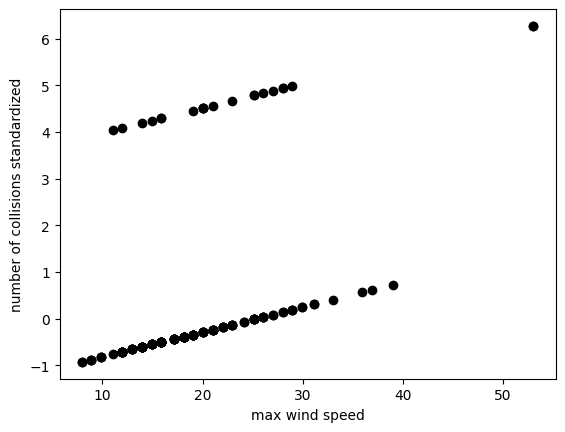

In [272]:
plt.scatter(input_wf["mxpsd"], linear_predictions_wf, color="black")
plt.xlabel("max wind speed")
plt.ylabel("number of collisions standardized")

Text(0, 0.5, 'number of collisions standardized')

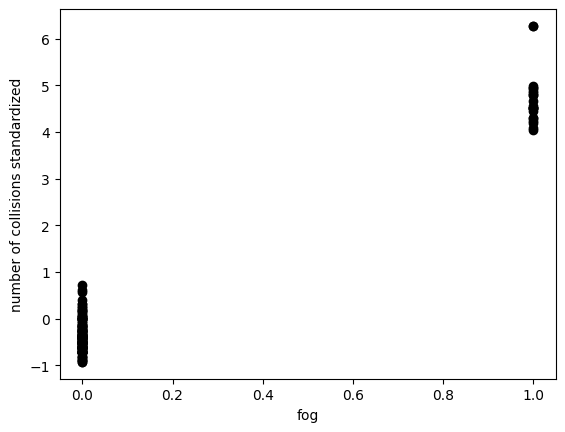

In [273]:
plt.scatter(input_wf["fog"], linear_predictions_wf, color="black")
plt.xlabel("fog")
plt.ylabel("number of collisions standardized")

**ALL WEATHER CATEGORIES**

In [254]:
df_input_data = [df["max"], df["mxpsd"], df["fog"], df["NUM_COLLISIONS"]]

df_input_headers = ["max", "mxpsd", "fog", "NUM_COLLISIONS"]

df_input_all = pd.concat(df_input_data, axis = 1, keys = df_input_headers)

In [255]:
results_all = getMeanAbsoluteError(df_input_all)

In [256]:
print(results_all["error"])

0.02283550798892975


In [257]:
input_all = pd.DataFrame.from_dict(data =
    {
        "max" : shuffle("max"),
        "mxpsd" : shuffle("mxpsd"),
        "fog" : shuffle("fog")
    })

In [258]:
linear_predictions_all = results_all["model"].predict(input_all) * SCALE_NUM_COLLISIONS
print(linear_predictions_all)

5/5 [==============================] - 0s 2ms/step
[[-3.346378  ]
 [-1.4640232 ]
 [-2.0572982 ]
 [-5.5218186 ]
 [-2.8006334 ]
 [-3.7410126 ]
 [ 1.1038078 ]
 [-3.3933294 ]
 [-5.9231563 ]
 [ 1.1110905 ]
 [-0.64555264]
 [-3.3933294 ]
 [-0.64225465]
 [-3.1405997 ]
 [-3.9505947 ]
 [-2.9573932 ]
 [-3.5607774 ]
 [ 6.0504313 ]
 [-4.9752417 ]
 [ 2.0856335 ]
 [ 5.4422297 ]
 [12.265628  ]
 [ 1.8802896 ]
 [-2.5517077 ]
 [ 0.67185676]
 [-4.200027  ]
 [-2.3997302 ]
 [-4.200859  ]
 [-6.094589  ]
 [ 0.11502575]
 [ 3.1741865 ]
 [-7.0731177 ]
 [ 0.16197689]
 [-5.1466746 ]
 [-1.8003308 ]
 [-2.9573932 ]
 [-0.8566538 ]
 [ 1.1077931 ]
 [ 2.7916522 ]
 [-0.0770193 ]
 [-2.6602483 ]
 [-2.1888814 ]
 [-3.3503633 ]
 [-0.6184898 ]
 [-1.4641682 ]
 [-1.2072004 ]
 [-2.2012343 ]
 [-3.5545084 ]
 [-2.0608492 ]
 [ 0.8664759 ]
 [ 3.170202  ]
 [-0.62247485]
 [-3.3973145 ]
 [-4.7147236 ]
 [-3.3933294 ]
 [-3.9545796 ]
 [-1.0742059 ]
 [ 1.1077931 ]
 [-0.26370525]
 [-1.4681532 ]
 [-4.5464435 ]
 [-1.3826185 ]
 [-1.6391518 ]
 [-0

Text(0, 0.5, 'number of collisions standardized')

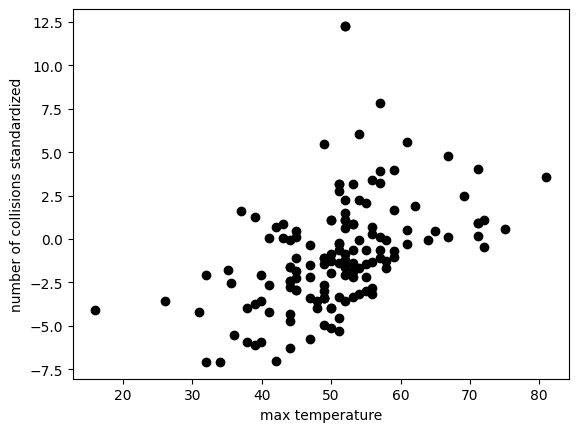

In [274]:
plt.scatter(input_all["max"], linear_predictions_all, color="black")
plt.xlabel("max temperature")
plt.ylabel("number of collisions standardized")

Text(0, 0.5, 'number of collisions standardized')

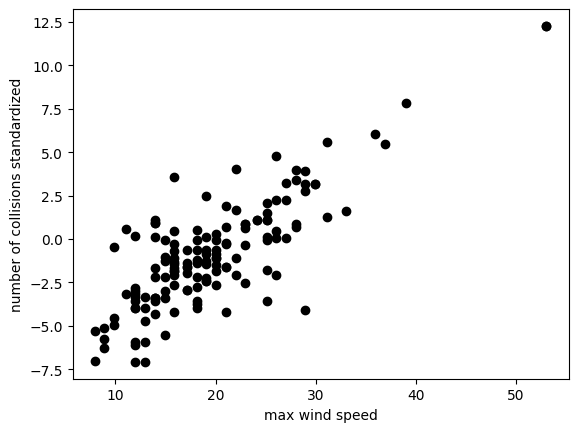

In [275]:
plt.scatter(input_all["mxpsd"], linear_predictions_all, color="black")
plt.xlabel("max wind speed")
plt.ylabel("number of collisions standardized")

Text(0, 0.5, 'number of collisions standardized')

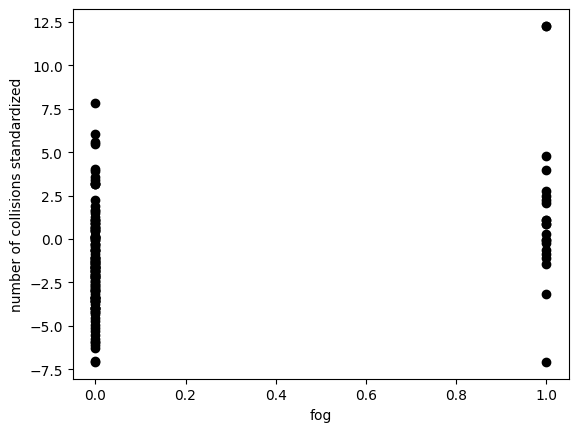

In [276]:
plt.scatter(input_all["fog"], linear_predictions_all, color="black")
plt.xlabel("fog")
plt.ylabel("number of collisions standardized")

Looking over the result and graphs for the multiple linear regression models, a clearer picture is painted on how different weather types affect each other and the number of collisions.

Looking at the interaction between temperature and max wind speed, it's clear that the variance in the number of collisions is much higher in max wind speed than it is in temperature. Max wind speed manages to maintain its predicted line like it did on its own, however, temperature is more spread out and randomised.

Fog has a clear effect on both max wind speed and temperature. Fog creates two lines graphs for whether fog is present or not. The linear regression models predicted that even on a windy day or on a high temperature day, whether fog is present or not will have an impact on the number of collisions.

Finally, when all the weather types are combined, max temperature sort of has a predicted linear trend upwards whilst max wind speed keeps it, but max wind speed now becomes like max temperature and is now highly varied in the scatter graph points.

# Conclusion

In conclusion, the linear regression models are sensitive models that can be impacted by missing data and/or incorrect data, so the dataset must be setup correctly before creating these linear regression models.

In the linear regression models created with the dataset above, there is clear evidence to suggest that, when isolated, temperature and max wind speed are predicted to have a positive correlation to the number of collisions whilst fog is predicted to have a negative correlation to the number of collisions.

However, when these different types of weather are put into a linear regression model together, the results start to obfuscate, especially when it came to mixing max wind speed and temperature. This is most likely due to the difference in variance between the number of collisions and the weather type, resulting in a scatter graph with no clear trend.

Despite this, the trends still seem to exist across the weather types, indicating that the linear regression models predictions for a weather type alone is still correct and matters.